**stroke meaning**

A stroke is a sudden disruption of blood flow to the brain & Risk factors include such as high blood pressure, smoking, and certain medical conditions

**Project (Classification model) on  Stroke Predicition**

In [ ]:
#import required library
import numpy as np #for numerical calculation
import pandas as pd #for data analysis
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
import warnings #to ignore warning
warnings.filterwarnings('ignore')

**Import data set**

In [ ]:
# read data set
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data Structure**

In [ ]:
df.shape # size of the data

(5110, 12)

In [ ]:
df.columns # column names


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Data Summary**

In [ ]:
df.info() # provides a concise summary of a DataFrame, including the data types and the number of non-null values in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe() # provide count, mean, standard deviation, minimum, and maximum values for each numerical column in the DataFrame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.corr() # correlation coefficients between the numerical columns in a DataFrame

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


The correlation coefficient between the 'stroke' column and the 'age' column is 0.245257. This positive correlation suggests that there is a moderate positive relationship between age and the likelihood of experiencing a stroke. As age increases, the likelihood of having a stroke tends to increase as well, based on the provided correlation coefficient.


**Data Cleaning**

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Handling Missing Values / null values**

In [ ]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**droping the id  column**

In [ ]:
df.drop(['id'], axis=1, inplace=True)

**Separating categorical and numerical variable**

In [ ]:
numeric_columns=df[['age','avg_glucose_level','bmi']]
categorical_columns=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                       'smoking_status', 'stroke']]

**Correlation Heatmap of Selected Numerical Features**

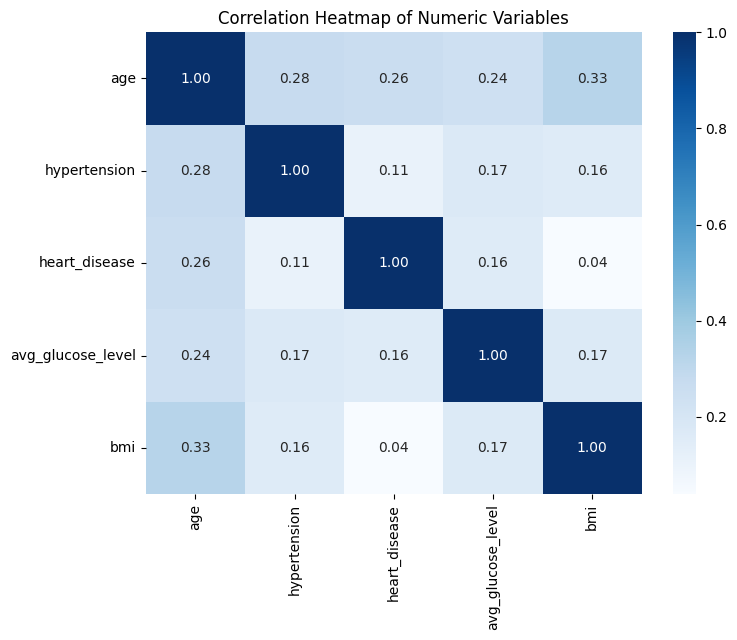

In [ ]:
# Correlation heatmap for numeric variables
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]

corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

**checking the outliers in numerical columns**

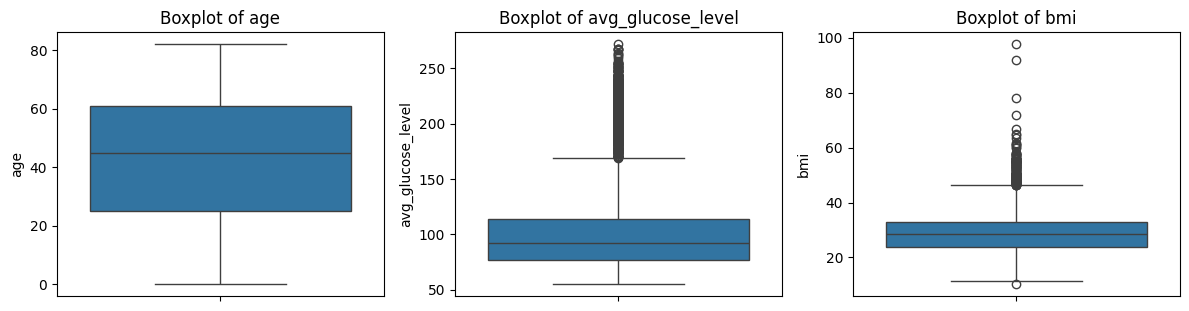

In [ ]:
# Create a figure to contain the boxplots
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]
plt.figure(figsize=(12, 6))

# Generate boxplots for each numeric column
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


**Remove outliers using IQR method**

In [ ]:
# Define the numeric columns with outliers
columns_with_outliers = ['bmi', 'avg_glucose_level']

# Remove outliers using IQR method
for column in columns_with_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering criteria to remove outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the DataFrame
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


**check box plot for numerical columns after removal**

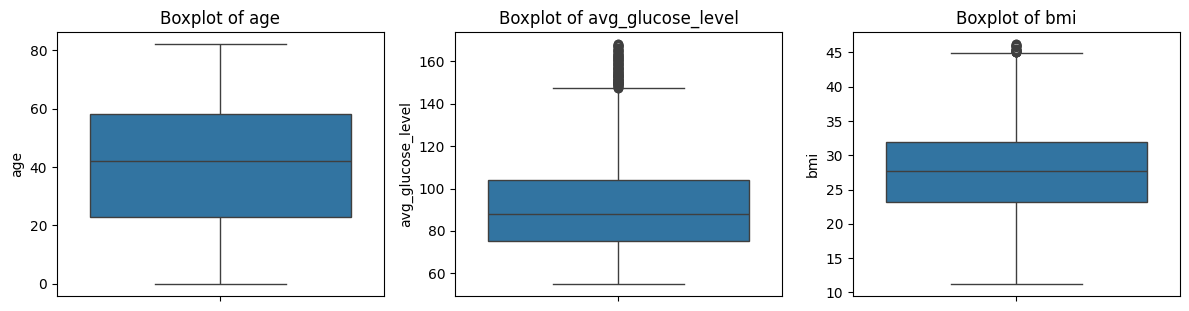

In [ ]:
# Create a figure to contain the boxplots
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]
plt.figure(figsize=(12, 6))

# Generate boxplots for each numeric column
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

**Visualizing Data Distributions: Histograms with KDE for 'Age' and 'Average Glucose Level' Columns**

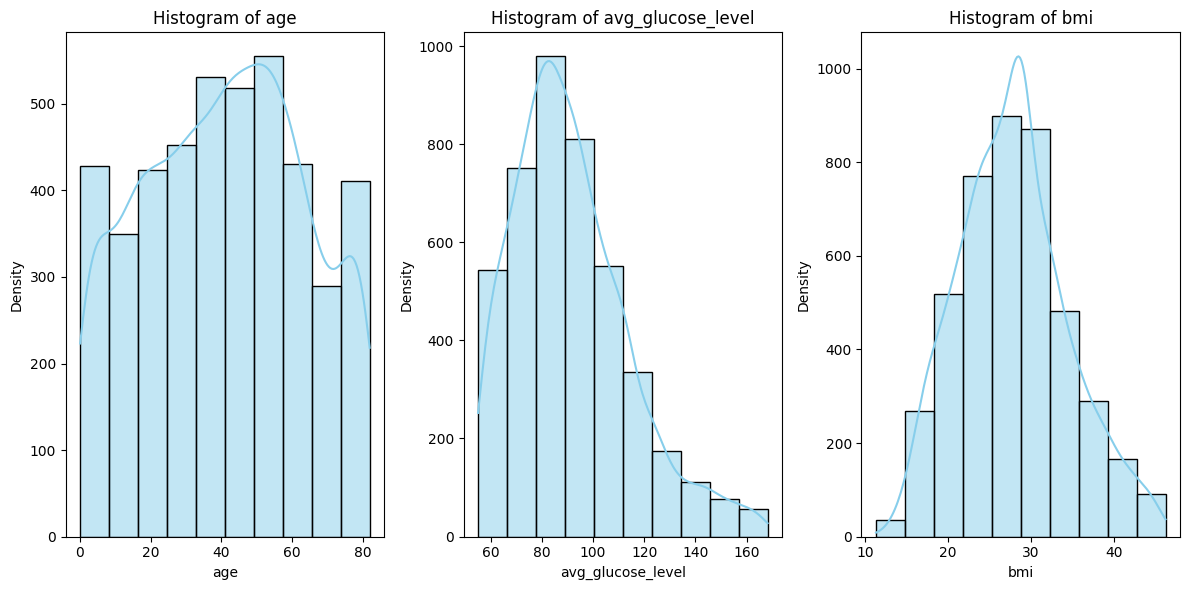

In [ ]:
#creating 'numeric_columns' contains the list of numeric column names
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
numeric_data = df[numeric_columns]

# Generate histograms for numeric columns
plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(numeric_data[column].dropna(), bins=10, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()




The data is positively skewed in all three histograms, meaning that there are more low values and fewer high values.


**Exploring Age Distribution with Stroke: A Violin Plot Analysis**

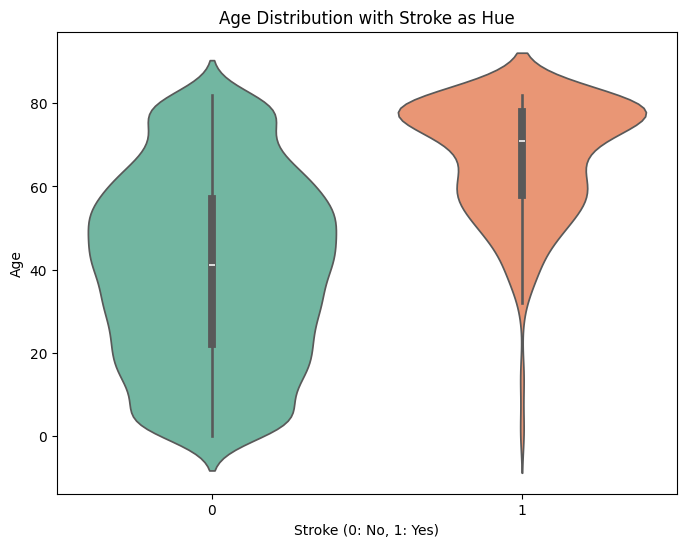

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='stroke', y='age', data=df, palette='Set2')
plt.title('Age Distribution with Stroke as Hue')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


**Creating Bar Charts for Various Categorical Variables in the Dataset**

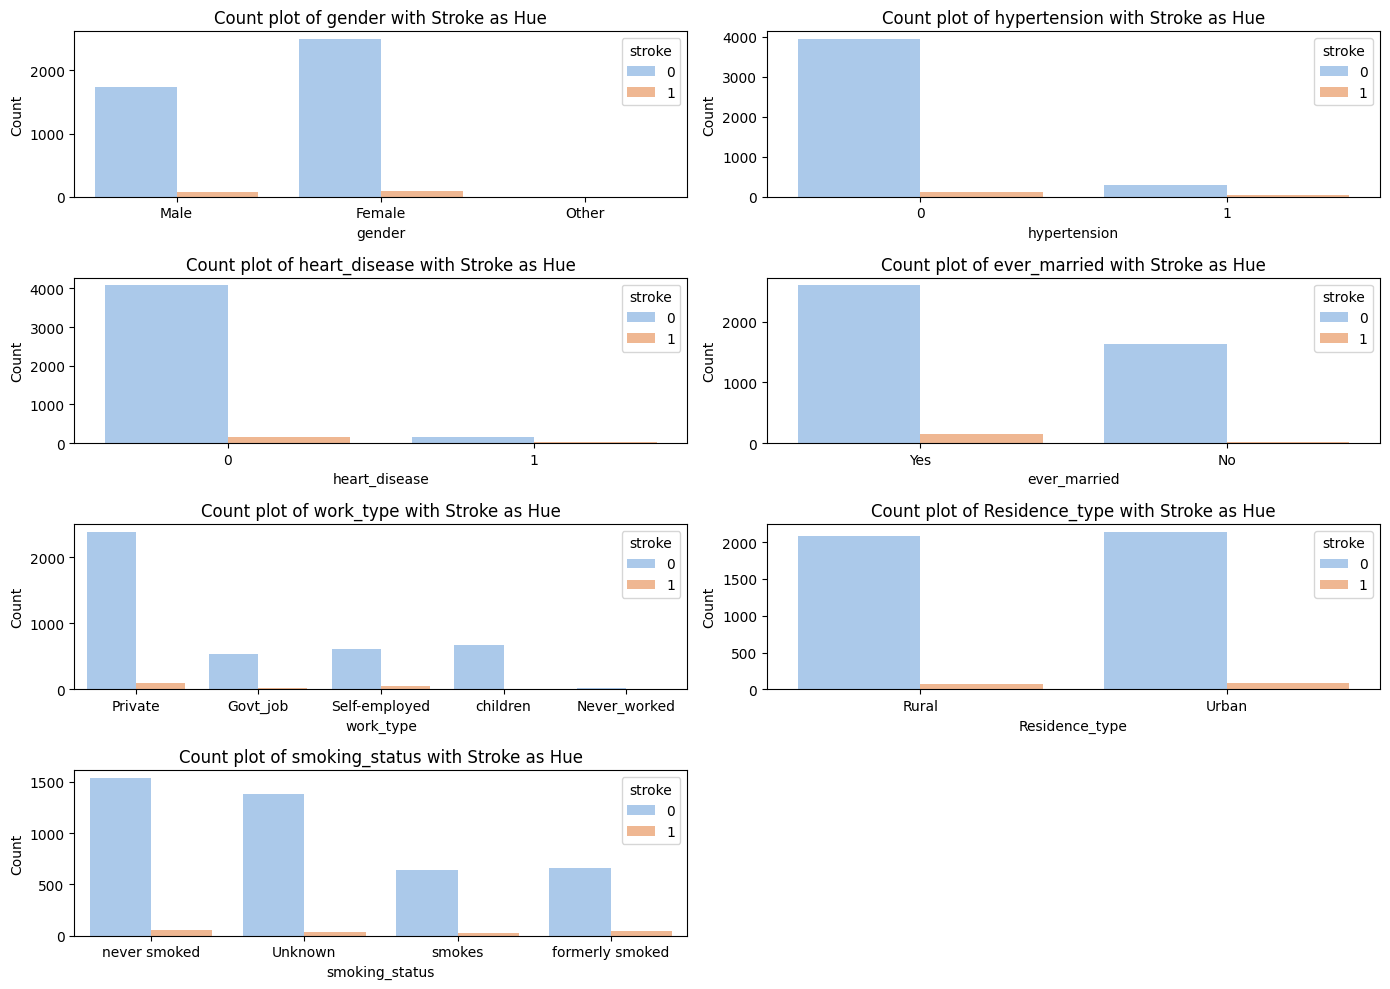

In [ ]:
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_categorical, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=column, data=df, hue='stroke', palette='pastel')
    plt.title(f'Count plot of {column} with Stroke as Hue')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Understanding Gender Distribution in the Dataset**

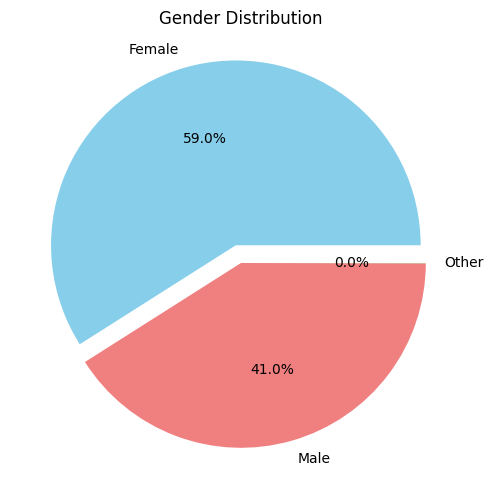

In [ ]:
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'], explode=(0.1, 0, 0))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


**Age and Average Glucose Level Dynamics with Stroke Differentiation**

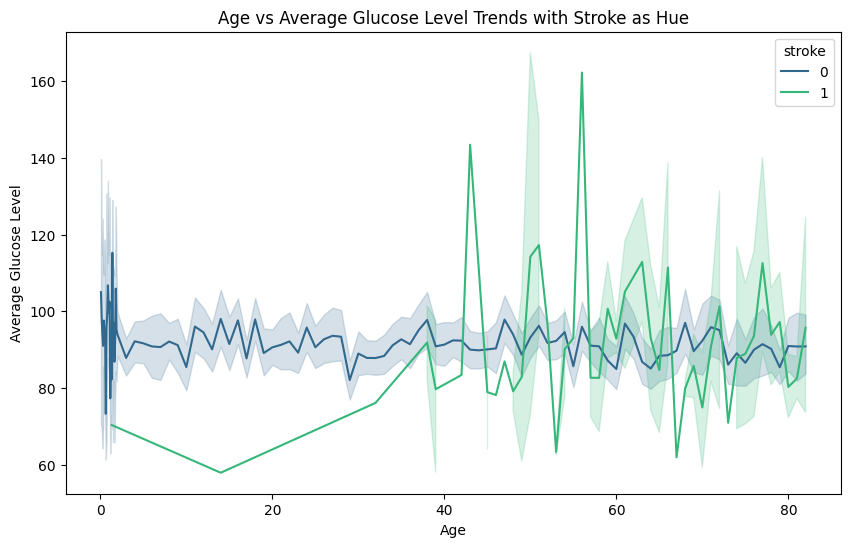

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='avg_glucose_level', data=df, hue='stroke', markers=True, palette='viridis')
plt.title('Age vs Average Glucose Level Trends with Stroke as Hue')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()


**Investigating Stroke Frequency Based on Marital Status**

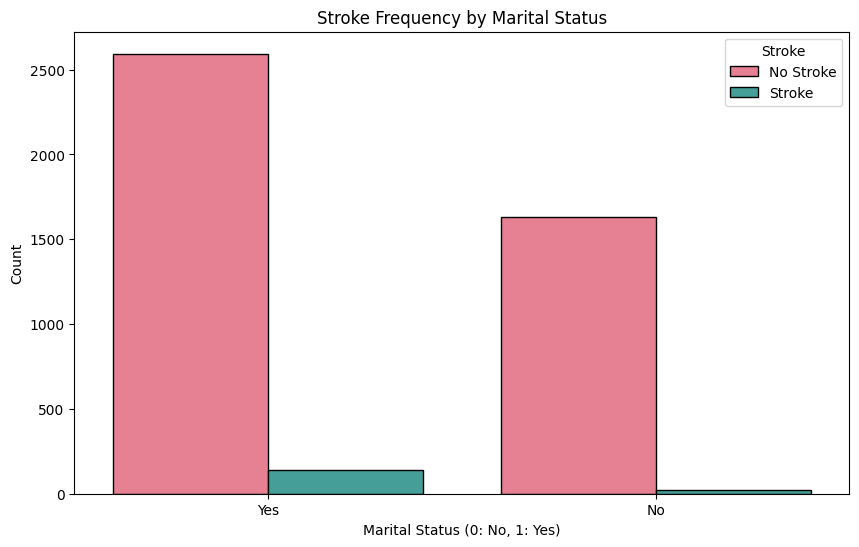

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_married', hue='stroke', data=df, palette='husl', edgecolor='black')
plt.title('Stroke Frequency by Marital Status')
plt.xlabel('Marital Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


**Mapping Categorical Values to Numerical Columns in DataFrame Columns(label encoding)**

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1, np.nan : 2}
ever_married_mapping = {'No': 0, 'Yes': 1, np.nan : 2}
work_type_mapping = {'Never_worked': 0, 'Govt_job': 1, 'Self-employed': 2, 'children' : 3, 'Private' : 4, np.nan : 5}
Residence_type_mapping = {'Rural': 0, 'Urban': 1, np.nan : 2}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked' : 3, np.nan : 4}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,0.0,80.0,0,1,1,4,0,105.92,32.500000,3.0,1
6,0.0,74.0,1,1,1,4,0,70.09,27.400000,3.0,1
7,1.0,69.0,0,0,0,4,1,94.39,22.800000,3.0,1
8,1.0,59.0,0,0,1,4,0,76.15,28.893237,NaN,1
9,1.0,78.0,0,0,1,4,1,58.57,24.200000,NaN,1


In [ ]:
marks_list = df['gender'].tolist()

marks_list

[0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0

**Defining Features and Target Variable**

In [ ]:
features = ['age','hypertension', 'heart_disease', 'ever_married', 'work_type']
X = df[features]
Y = df['stroke']
#Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Importing necessary libraries and modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')

Decision Tree Accuracy: 0.9635535307517085
Random Forest Accuracy: 0.9635535307517085
KNN Accuracy: 0.9646924829157175


Overall, all three classifiers demonstrate high accuracy on the test set, with Random Forest and KNN achieving slightly higher accuracy than the Decision Tree

**USER_INPUT FOR STROKE PREDICTION**

In [ ]:
# Get user input for stroke prediction
user_age = float(input("Enter age: "))
user_hypertension = int(input("Enter hypertension (0 for No, 1 for Yes): "))
user_heart_disease = int(input("Enter heart disease (0 for No, 1 for Yes): "))
user_ever_married = int(input("Enter marital status (0 for No, 1 for Yes): "))
user_work_type = int(input("Enter work type (0-Never worked, 1-Govt job, 2-Self-employed, 3-Children, 4-Private): "))

# Create user data array with age separately
user_data = np.array([[user_age, user_hypertension, user_heart_disease, user_ever_married, user_work_type]])

# Predict stroke based on user input
predicted_stroke = rf_classifier.predict(user_data)

# Output prediction result
print("The prediction suggests likelihood of stroke." if predicted_stroke[0] == 1 else "The prediction suggests no significant likelihood of stroke.")

Enter age: 56
Enter hypertension (0 for No, 1 for Yes): 1
Enter heart disease (0 for No, 1 for Yes): 1
Enter marital status (0 for No, 1 for Yes): 1
Enter work type (0-Never worked, 1-Govt job, 2-Self-employed, 3-Children, 4-Private): 4
The prediction suggests no significant likelihood of stroke.


**Conclusion:**
The analysis and modeling suggest that age, hypertension, heart disease, marital status, and work type are significant factors in predicting the likelihood of a stroke. The machine learning models, particularly Random Forest and K-Nearest Neighbors, exhibit strong predictive performance. Users can input personal information, and the Random Forest model predicts the likelihood of a stroke based on the provided data. The overall project provides valuable insights for understanding and predicting strokes based on health-related features.

**@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@THANK YOU@@@@@@@@@@@@@@@@@@@@@@@@**



